In [1]:
import pandas as pd
import numpy as np
import h5py
import sys 
import glob

import matplotlib.pyplot as plt
import scipy.io as sio

sys.path.append('/home/lugeon/eeg_project/scripts')
from training.dataset.datasets import EEG_Image_Batch_Dataset

/home/lugeon/miniconda3/envs/eeg-dream-conda/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
from training.representation import models, losses

In [ ]:
loss = losses.AdverserialLoss()

In [2]:
with np.load('/mlodata1/lugeon/dream_data/processed/healthy/images/H009.npz') as images:
    for k in images:
        print(k)

H009_E1_NREM_S03.img
H009_E1_NREM_S05.img
H009_E1_NREM_S06.img
H009_E1_NREM_S07.img
H009_E1_NREM_S09.img
H009_E1_REM_S04.img
H009_E1_REM_S08.img
H009_E1_REM_S12.img
H009_E2_NREM_S01.img
H009_E2_NREM_S07.img
H009_E2_NREM_S08.img
H009_E2_NREM_S09.img
H009_E1_NREM_S01.img
H009_E1_NREM_S02.img


In [4]:
with np.load('/home/lugeon/eeg_project/H009.npz') as images:
    h018 = images['H009_E1_REM_S12.img']

h018.shape

(237, 5, 32, 32)

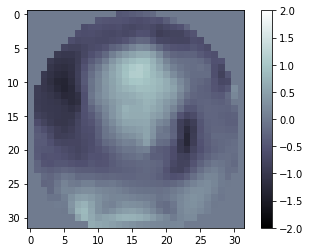

In [5]:
fig, ax = plt.subplots()
shw = ax.imshow(h018[3, 4, :, :], cmap='bone', vmin=-2, vmax=2);
bar = plt.colorbar(shw)

In [ ]:
fig, ax = plt.subplots()
shw = ax.imshow(h018[0, 1, :, :], cmap='bone', vmin=-2, vmax=2);
bar = plt.colorbar(shw)

In [ ]:
with h5py.File('/mlodata1/yuecetue/eeg-dreams/YuceturkThesis2020/Data/hdf5/32_32_FFT_data_all_bands_120s_20sbj_log_z-score_stages23') as f:
    for k in f:
        print(f[k])

In [4]:
with h5py.File('/mlodata1/lugeon/dream_data/processed/baseline/dataset_bis.h5') as f:
    for k in f:
        print(f[k])

    frame_id = f['frame_id'][:]
    subject_id = f['subject_id'][:]
    trial_id = f['trial_id'][:]
    images = f['images'][:]
    labels = f['labels'][:]
    sleep_cycle = f['sleep_cycle'][:]

<HDF5 dataset "frame_id": shape (46176,), type "<f4">
<HDF5 dataset "images": shape (46176, 5, 32, 32), type "<f4">
<HDF5 dataset "labels": shape (46176,), type "<f4">
<HDF5 dataset "sleep_cycle": shape (46176,), type "<f4">
<HDF5 dataset "sleep_stage": shape (46176,), type "<f4">
<HDF5 dataset "subject_id": shape (46176,), type "<f4">
<HDF5 dataset "subject_name": shape (1,), type "|S4">
<HDF5 dataset "trial_id": shape (46176,), type "<f4">


In [8]:
pd.DataFrame(sleep_cycle).value_counts()

2.0    14814
3.0    10614
4.0    10494
1.0    10254
dtype: int64

In [12]:
with h5py.File('/mlodata1/lugeon/dream_data/processed/healthy/dataset_small.h5') as f:

    df = pd.DataFrame({
                'sid': f['subject_id'][:], 
                'tid': f['trial_id'][:], 
                'fid': f['frame_id'][:],
                'ss': f['sleep_stage'][:]
                })

In [34]:
file_path = '/mlodata1/lugeon/dream_data/chuv/healthy/H009/H009_E1_NREM_S01.mat'
with h5py.File(file_path,'r') as file:
        for k in file:
                print(k)
        time_signal = np.array(file['subject'])

#refs#
chanlocs
condi
datavr
events
numseg
ordseg
reactime
srate
stage
subject


In [35]:
time_signal

array([[72],
       [48],
       [48],
       [57]], dtype=uint16)

In [14]:
file_path = '/mlodata1/lugeon/dream_data/chuv/healthy/M001/M001_E10_NREM_S4.mat'
sio.loadmat(file_path)['datavr_2min'].shape

(257, 60000)

In [6]:
np.append(np.arange(10), 20)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 20])

In [3]:
import torch
from torch import nn
import importlib
sys.path.append('/home/lugeon/eeg_project/scripts')
from training.representation import models

/home/lugeon/miniconda3/envs/eeg-dream-conda/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
importlib.reload(models)

<module 'training.representation.models' from '/home/lugeon/eeg_project/scripts/training/representation/models/__init__.py'>

In [7]:
result_dir = '/home/lugeon/eeg_project/scripts/training/representation/result'
#model_name = 'arch_comparison/next_frame_vgg_maxpool'
model_name = 'transformers/masked_auto_encoder_mask9'
encoder_model_dir = f'{result_dir}/{model_name}'

d = torch.load(encoder_model_dir + '/checkpoint.pt')

In [13]:
d_ = {k.replace('patch_encoder', 'patch_transform').replace('patch_decoder', 'pixel_transform'):v for k, v in d.items()}

In [ ]:
torch.save(d_, encoder_model_dir + '/checkpoint.pt')

In [14]:
d_.keys()

dict_keys(['mask_token', 'encoder.0.0.fn.0.weight', 'encoder.0.0.fn.0.bias', 'encoder.0.0.fn.1.qkv.weight', 'encoder.0.0.fn.1.qkv.bias', 'encoder.0.0.fn.1.projection.weight', 'encoder.0.0.fn.1.projection.bias', 'encoder.0.1.fn.0.weight', 'encoder.0.1.fn.0.bias', 'encoder.0.1.fn.1.0.weight', 'encoder.0.1.fn.1.0.bias', 'encoder.0.1.fn.1.3.weight', 'encoder.0.1.fn.1.3.bias', 'encoder.1.0.fn.0.weight', 'encoder.1.0.fn.0.bias', 'encoder.1.0.fn.1.qkv.weight', 'encoder.1.0.fn.1.qkv.bias', 'encoder.1.0.fn.1.projection.weight', 'encoder.1.0.fn.1.projection.bias', 'encoder.1.1.fn.0.weight', 'encoder.1.1.fn.0.bias', 'encoder.1.1.fn.1.0.weight', 'encoder.1.1.fn.1.0.bias', 'encoder.1.1.fn.1.3.weight', 'encoder.1.1.fn.1.3.bias', 'encoder.2.0.fn.0.weight', 'encoder.2.0.fn.0.bias', 'encoder.2.0.fn.1.qkv.weight', 'encoder.2.0.fn.1.qkv.bias', 'encoder.2.0.fn.1.projection.weight', 'encoder.2.0.fn.1.projection.bias', 'encoder.2.1.fn.0.weight', 'encoder.2.1.fn.0.bias', 'encoder.2.1.fn.1.0.weight', 'encoder

In [1]:
d = {'1': 1, '2': 2}

In [3]:
'1' in d.keys()

True

In [17]:
torch.arange(5)[[0, 4]].sum().item()

4

In [21]:
torch.stack((torch.tensor(1), torch.tensor(2)))

tensor([1, 2])

In [5]:
n = '.2f'
f'{0.1234:{n}}'

'0.12'

In [12]:
f"[{', '.join([f'{e:.2f}' for e in [0.1234, 0.5678]])}]"

'[0.12, 0.57]'